# Step 4: Tidying up
- despine, naked
- tick (multiplier)
- ... 

In [2]:
## use these magic commands to automatically reload modules:
%load_ext autoreload
%autoreload 2
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
sys.path.append('../scripts/')
import rep_fig_vis as rfv  # package with general-purpose visualisation functions 
import tutorial_rf_functions as tut  # functions written specifically for this tutorial 

## Understanding matplotlib figure elements
In the previous steps we've seen how to structure plotting routines into functions, and how to compose a set of axes that can be filled in with these plots. But to get publication-quality figures, we now need to 'polish' the figure, i.e., visualise the results/data effectively and make the figure visually appealing. 

In this patr, we will focus on 'tidying up'. In other words, getting rid of unnecessary visual elements and adding some standard elements (like titles and panel numbers) in an automated way. In the next (and last) step, we will consider adding unique elements (such as extra bits of text or arrows). 

In this tutorial we will refer to some `matplotlib`-specific names of figure elements, such as _spines_, _ticks_ and _labels_. Their meanings are best explained by the following visual:

<img src="tutorial_content/fig_explainer_mpl_objects.jpeg" style="width:500px">

Source: https://twitter.com/mervenoyann/status/1549035813689667587?s=20

For this tutorial, we will introduce some functions that make life easy and tidy up some of these elements, in ways that are common to scientific publications. Further I will show how to use `matplotlib` native functions to alter a few of these elements, which should be fairly straightforward to apply to other elements using online documentation.

## Figure and font size
Firstly, make sure the figure is of the right size. When you create a figure, either by `fig = plt.figure()` or for example `fig, ax = plt.subplots()`, you should pass the desired size using the argument `figsize=(width_inches, height_inches)`. Tip: most journals specify the allowed figure size (particularly widths: page-width, half-page, ..). 

Next, set the font size. Firstly, you can change the default (font size) parameters of `matplotlib`. Secondly, you can always override default parameters for each text element individually. Use the following functions to update all font sizes (labels, titles, etc.) to the same size:

In [17]:
rfv.set_fontsize(font_size=10)  # this updated the default values for font size

Font size is set to 10


## Cleaning up:
Graphs are often clearer when unnecessary elements are removed. Let's start with the _spines_. In general, spines can be included/excluded by `ax.spines['top'].set_visible(True)` (or `False`). This package provides two shortcut functions that cover most applications: `rfv.despine()` and `rfv.naked()`. The figure below shows normal, despined and naked 'frames' for 3 different types of plots (line, scatter, heatmap). What frame do you like best per plot (there are no wrong answers!)?

Text(0.5, 1.0, 'Naked frame (0 spines)')

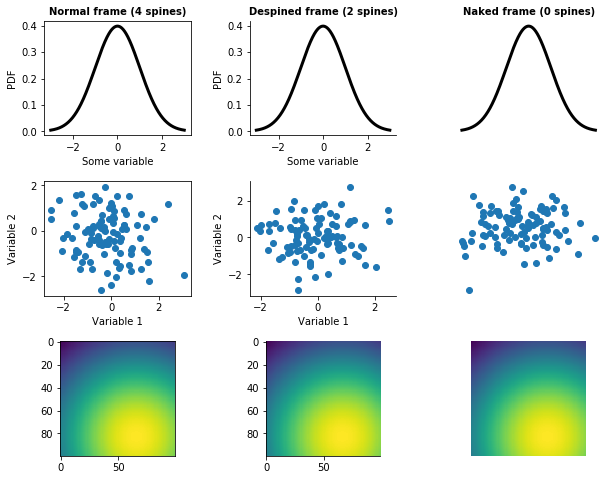

In [19]:
fig, ax = plt.subplots(3, 3, figsize=(10, 8),  # figure is set to 10 inches wide by 8 inches high
                       gridspec_kw={'wspace': 0.4, 'hspace': 0.4})  # via the gridspec_kw argument, we are able to adjust individual gridspec parameters such as the spacing between subplots

for row in range(3):
    for col, curr_ax in enumerate(ax[row]):
        if row == 0:
            tut.plot_normal_distr(ax=curr_ax)
        elif row == 1:
            tut.plot_scatter_data_distr(ax=curr_ax)
            curr_ax.set_xlabel('Variable 1')
            curr_ax.set_ylabel('Variable 2')
        elif row == 2:
            tut.plot_gaussian_profile(ax=curr_ax, remove_spines=False, title='')

    rfv.despine(ax[row][1])  # remove right and top spine
    rfv.naked(ax[row][2])  # remove all 4 spines, ticks and labels

ax[0][0].set_title('Normal frame (4 spines)', weight='bold')
ax[0][1].set_title('Despined frame (2 spines)', weight='bold')
ax[0][2].set_title('Naked frame (0 spines)', weight='bold')